In [1]:
setwd(fs::path_abs("~/Local_Workspace/TesiMag"))
library(arrow, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)

source("src/paths/paths.R")
source("notebooks/integrazioni_regionali/nb_tools/state_avail.R")
source("notebooks/integrazioni_regionali/nb_tools/pairing_procedure.R")
path.er <- file.path(path.ds, "ARPA", "EMILIA-ROMAGNA")


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

terra 1.7.55

Caricamento del pacchetto richiesto: abind



In [ ]:
er <- open_dataset(file.path(path.er, "dataset"), format = "feather")


In [3]:
scia <- open_db_state_data("SCIA", "Emilia-Romagna")
dpc <- open_db_state_data("BRUN", "Emilia-Romagna")

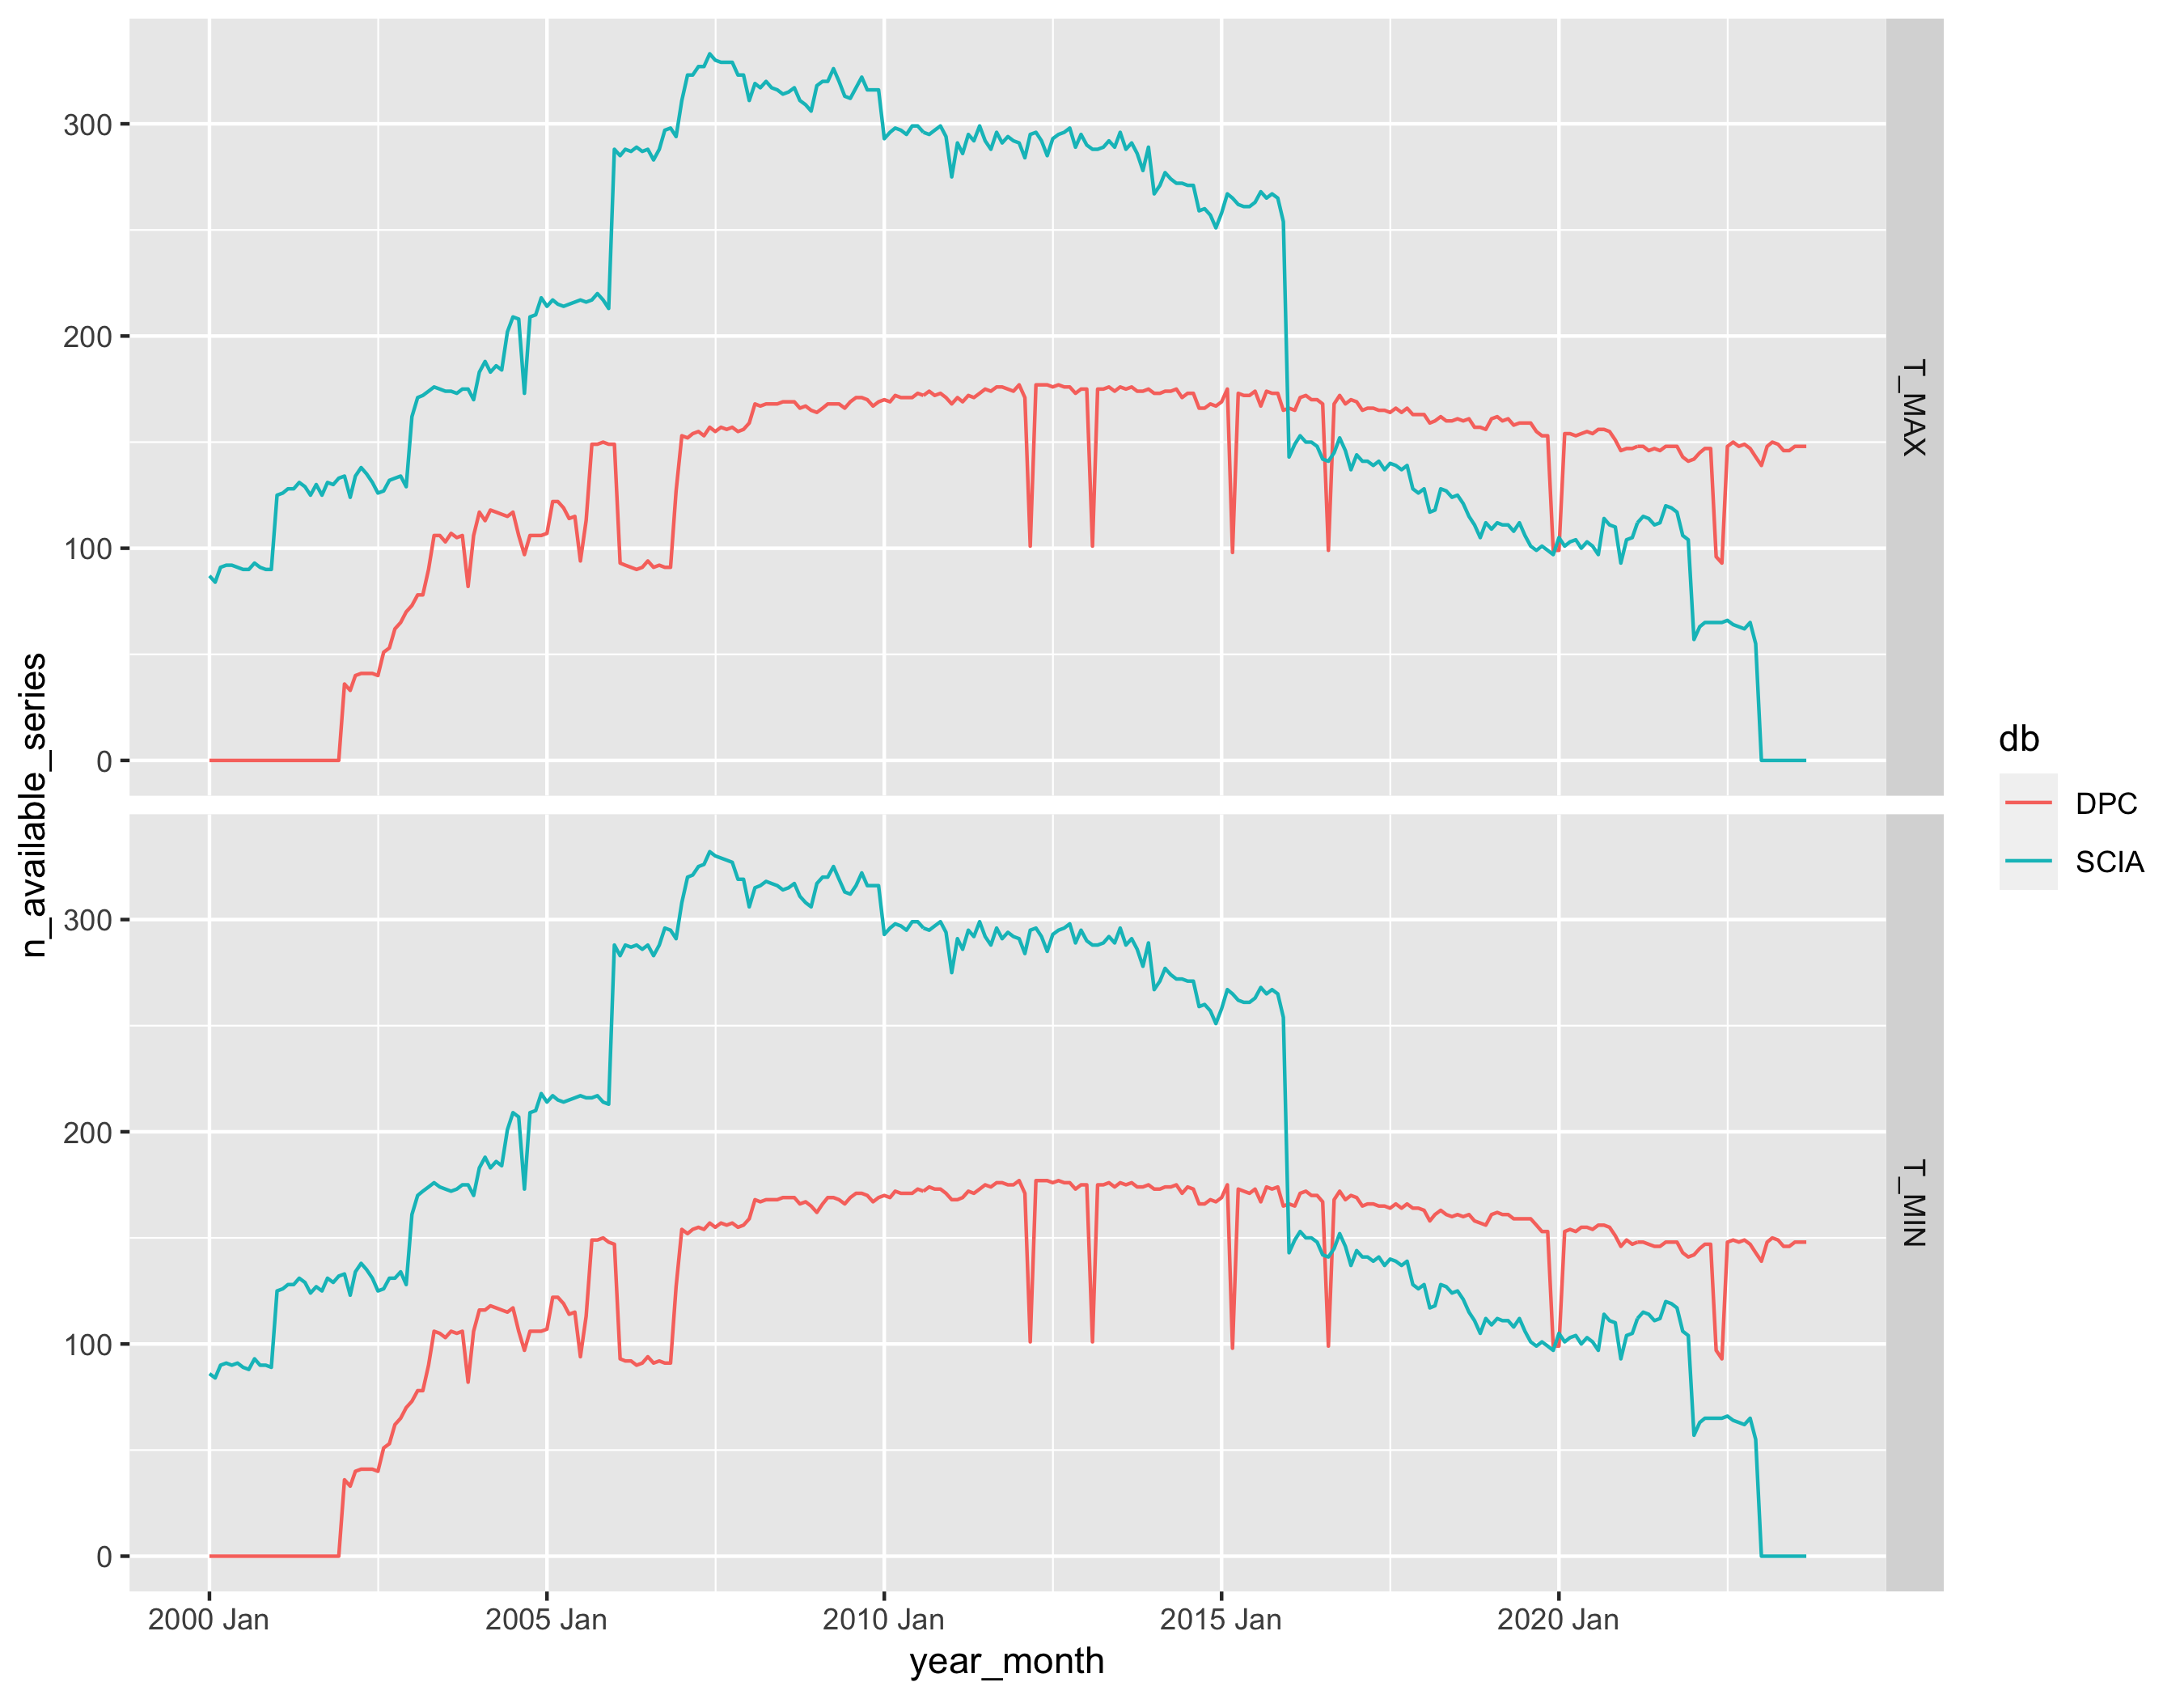

In [4]:
plot_state_avail(bind_rows(
    SCIA = scia,
    DPC = dpc,
    .id = "db"
))

In [2]:
ds <- read_json_arrow(file.path(path_er, "2016-01.json"), as_data_frame = FALSE) |> slice_head(n = 500000) |> collect()


In [42]:
library(tidyr)
vrs <- ds |>
    slice_head(n = 50) |>
    unnest_wider(data) |>
    select(date, vars, timerange, level)
    # |>
    # unnest_longer(c(vars, timerange, level))
    # unnest_wider(vars)
# unnest_wider(c(timerange, level), names_sep = "_") |>
# pull(vars)


Warning message:
"Expression !(is.na(pull(pull(pull(data, vars), B01019), v))) not supported in Arrow; pulling data into R"


In [40]:
vrs |> unnest_longer(c(vars, timerange, level)) |> mutate(vars = select(vars, B01019, )) |> print(n = 170)

# A tibble: 170 x 4
    date                vars$B01019$v       timerange           level
    <dttm>              <chr>         <list<integer>> <list<integer>>
  1 2006-01-01 01:00:00 Carpineti                                    
  2 2006-01-01 01:00:00 NA                        [3]             [4]
  3 2006-01-01 01:00:00 NA                        [3]             [4]
  4 2006-01-01 01:00:00 NA                        [3]             [4]
  5 2006-01-01 01:00:00 NA                        [3]             [4]
  6 2006-01-01 01:00:00 NA                        [3]             [4]
  7 2006-01-01 01:00:00 NA                        [3]             [4]
  8 2006-01-01 01:00:00 NA                        [3]             [4]
  9 2006-01-01 01:00:00 NA                        [3]             [4]
 10 2006-01-01 01:00:00 NA                        [3]             [4]
 11 2006-01-01 01:00:00 NA                        [3]             [4]
 12 2006-01-01 01:15:00 Carpineti                                    


In [34]:
vrs |>
    select(where(~ any(!is.na(.)))) |>
    select(!c(B01194, starts_with("B0400"), starts_with("B05"), starts_with("B06"), starts_with("B07"))) |> # metadata
    select(!c(B13011, B13003)) |> print() # data (precip, humidity)
    # unnest_wider(starts_with("B"), names_sep = "_") |>
    # select(!ends_with("_a")) |> 
    # filter(!if_all(starts_with("B"), is.na)) |>
    # unnest_wider(c(level, timerange), names_sep = "_") |>
    # select(!c(level_3, level_4))


ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31mx[39m Column `B01194` doesn't exist.


In [28]:
ds |>
    slice_head(n = 1) |>
    collect() |>
    unnest_wider(data) |>
    hoist(vars, TEMP = "B12101") |>
    unnest_longer(c(TEMP, timerange, level)) |>
    unnest_wider(TEMP) |>
    unnest_longer(timerange) |>
    select(date, TEMP = v, timerange, level) |>
    unnest_longer(level) |>
    drop_na(TEMP) |>
    print()


# A tibble: 84 x 4
   date                 TEMP timerange level
   <dttm>              <dbl>     <int> <int>
 1 2016-01-01 01:00:00  274.         0   103
 2 2016-01-01 01:00:00  274.         0  2000
 3 2016-01-01 01:00:00  274.         0    NA
 4 2016-01-01 01:00:00  274.         0    NA
 5 2016-01-01 01:00:00  274.         0   103
 6 2016-01-01 01:00:00  274.         0  2000
 7 2016-01-01 01:00:00  274.         0    NA
 8 2016-01-01 01:00:00  274.         0    NA
 9 2016-01-01 01:00:00  274.      3600   103
10 2016-01-01 01:00:00  274.      3600  2000
# i 74 more rows


In [3]:
sample <- read_json_arrow(file.path(path_er, "2016-01.json"), as_data_frame = FALSE) |>
    slice_head(n = 5000) |>
    as_tibble()


In [4]:
sample


version network ident lon     lat     date               
1    0.1     agrmet  NA    1050865 4447562 2016-01-01 01:00:00
2    0.1     agrmet  NA    1050865 4447562 2016-01-01 01:15:00
3    0.1     agrmet  NA    1050865 4447562 2016-01-01 01:30:00
4    0.1     agrmet  NA    1050865 4447562 2016-01-01 01:45:00
5    0.1     agrmet  NA    1050865 4447562 2016-01-01 02:00:00
6    0.1     agrmet  NA    1050865 4447562 2016-01-01 02:15:00
7    0.1     agrmet  NA    1050865 4447562 2016-01-01 02:30:00
8    0.1     agrmet  NA    1050865 4447562 2016-01-01 02:45:00
9    0.1     agrmet  NA    1050865 4447562 2016-01-01 03:00:00
10   0.1     agrmet  NA    1050865 4447562 2016-01-01 03:15:00
11   0.1     agrmet  NA    1050865 4447562 2016-01-01 03:30:00
12   0.1     agrmet  NA    1050865 4447562 2016-01-01 03:45:00
13   0.1     agrmet  NA    1050865 4447562 2016-01-01 04:00:00
14   0.1     agrmet  NA    1050865 4447562 2016-01-01 04:15:00
15   0.1     agrmet  NA    1050865 4447562 2016-01-01 04:30:00
16   0.1     agrmet  NA    1050865 4447562 2016-01-01 04:45:00
17   0.1     agrmet  NA    1050865 4447562 2016-01-01 05:00:00
18   0.1     agrmet  NA    1050865 4447562 2016-01-01 05:15:00
19   0.1     agrmet  NA    1050865 4447562 2016-01-01 05:30:00
20   0.1     agrmet  NA    1050865 4447562 2016-01-01 05:45:00
21   0.1     agrmet  NA    1050865 4447562 2016-01-01 06:00:00
22   0.1     agrmet  NA    1050865 4447562 2016-01-01 06:15:00
23   0.1     agrmet  NA    1050865 4447562 2016-01-01 06:30:00
24   0.1     agrmet  NA    1050865 4447562 2016-01-01 06:45:00
25   0.1     agrmet  NA    1050865 4447562 2016-01-01 07:00:00
26   0.1     agrmet  NA    1050865 4447562 2016-01-01 07:15:00
27   0.1     agrmet  NA    1050865 4447562 2016-01-01 07:30:00
28   0.1     agrmet  NA    1050865 4447562 2016-01-01 07:45:00
29   0.1     agrmet  NA    1050865 4447562 2016-01-01 08:00:00
30   0.1     agrmet  NA    1050865 4447562 2016-01-01 08:15:00
...  ...     ...     ...   ...     ...     ...                
4971 0.1     agrmet  NA    1159701 4441112 2016-01-21 19:30:00
4972 0.1     agrmet  NA    1159701 4441112 2016-01-21 19:45:00
4973 0.1     agrmet  NA    1159701 4441112 2016-01-21 20:00:00
4974 0.1     agrmet  NA    1159701 4441112 2016-01-21 20:15:00
4975 0.1     agrmet  NA    1159701 4441112 2016-01-21 20:30:00
4976 0.1     agrmet  NA    1159701 4441112 2016-01-21 20:45:00
4977 0.1     agrmet  NA    1159701 4441112 2016-01-21 21:00:00
4978 0.1     agrmet  NA    1159701 4441112 2016-01-21 21:15:00
4979 0.1     agrmet  NA    1159701 4441112 2016-01-21 21:30:00
4980 0.1     agrmet  NA    1159701 4441112 2016-01-21 21:45:00
4981 0.1     agrmet  NA    1159701 4441112 2016-01-21 22:00:00
4982 0.1     agrmet  NA    1159701 4441112 2016-01-21 22:15:00
4983 0.1     agrmet  NA    1159701 4441112 2016-01-21 22:30:00
4984 0.1     agrmet  NA    1159701 4441112 2016-01-21 22:45:00
4985 0.1     agrmet  NA    1159701 4441112 2016-01-21 23:00:00
4986 0.1     agrmet  NA    1159701 4441112 2016-01-21 23:15:00
4987 0.1     agrmet  NA    1159701 4441112 2016-01-21 23:30:00
4988 0.1     agrmet  NA    1159701 4441112 2016-01-21 23:45:00
4989 0.1     agrmet  NA    1159701 4441112 2016-01-22 00:00:00
4990 0.1     agrmet  NA    1159701 4441112 2016-01-22 00:15:00
4991 0.1     agrmet  NA    1159701 4441112 2016-01-22 00:30:00
4992 0.1     agrmet  NA    1159701 4441112 2016-01-22 00:45:00
4993 0.1     agrmet  NA    1159701 4441112 2016-01-22 01:00:00
4994 0.1     agrmet  NA    1159701 4441112 2016-01-22 01:15:00
4995 0.1     agrmet  NA    1159701 4441112 2016-01-22 01:30:00
4996 0.1     agrmet  NA    1159701 4441112 2016-01-22 01:45:00
4997 0.1     agrmet  NA    1159701 4441112 2016-01-22 02:00:00
4998 0.1     agrmet  NA    1159701 4441112 2016-01-22 02:15:00
4999 0.1     agrmet  NA    1159701 4441112 2016-01-22 02:30:00
5000 0.1     agrmet  NA    1159701 4441112 2016-01-22 02:45:00
     data                                                                                          